# **What is Diabetes?**
Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes. Let’s get started!

# **About this project :-**
The objective of this project is to classify whether someone has diabetes or not.
Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

# **About the Dataset:**
Pregnancies :- Number of times a woman has been pregnant

Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test

BloodPressure :- Diastollic Blood Pressure (mm hg)

SkinThickness :- Triceps skin fold thickness(mm)

Insulin :- 2 hour serum insulin(mu U/ml)

BMI :- Body Mass Index ((weight in kg/height in m)^2)

Age :- Age(years)

DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)

Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

# **Importing** **Libraries**

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
## reading the dataset
df=pd.read_csv('/content/drive/MyDrive/Interns/diabetes (4).csv')

In [190]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [191]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [192]:

df.shape

(768, 9)

# **Exploratory Data Analysis (EDA)**

In [193]:
## checking the null values
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [195]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [196]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# **Data Visualization**

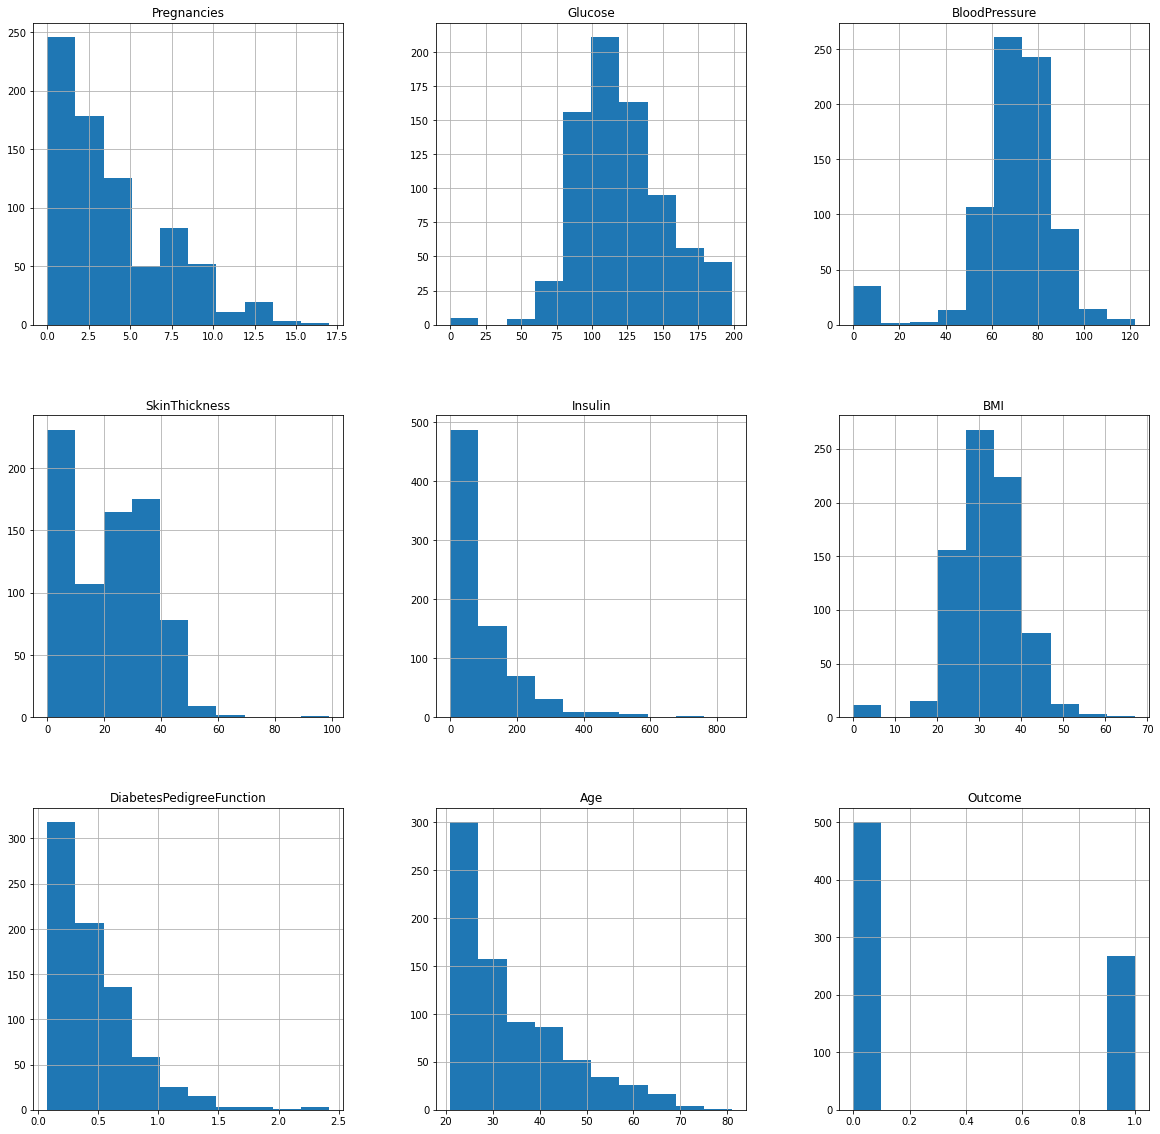

In [197]:
##Plotting the data distribution plots before removing null values
p = df.hist(figsize = (20,20))

<ipython-input-198-3cf456682eb3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-198-3cf456682eb3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-198-3cf456682eb3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed i

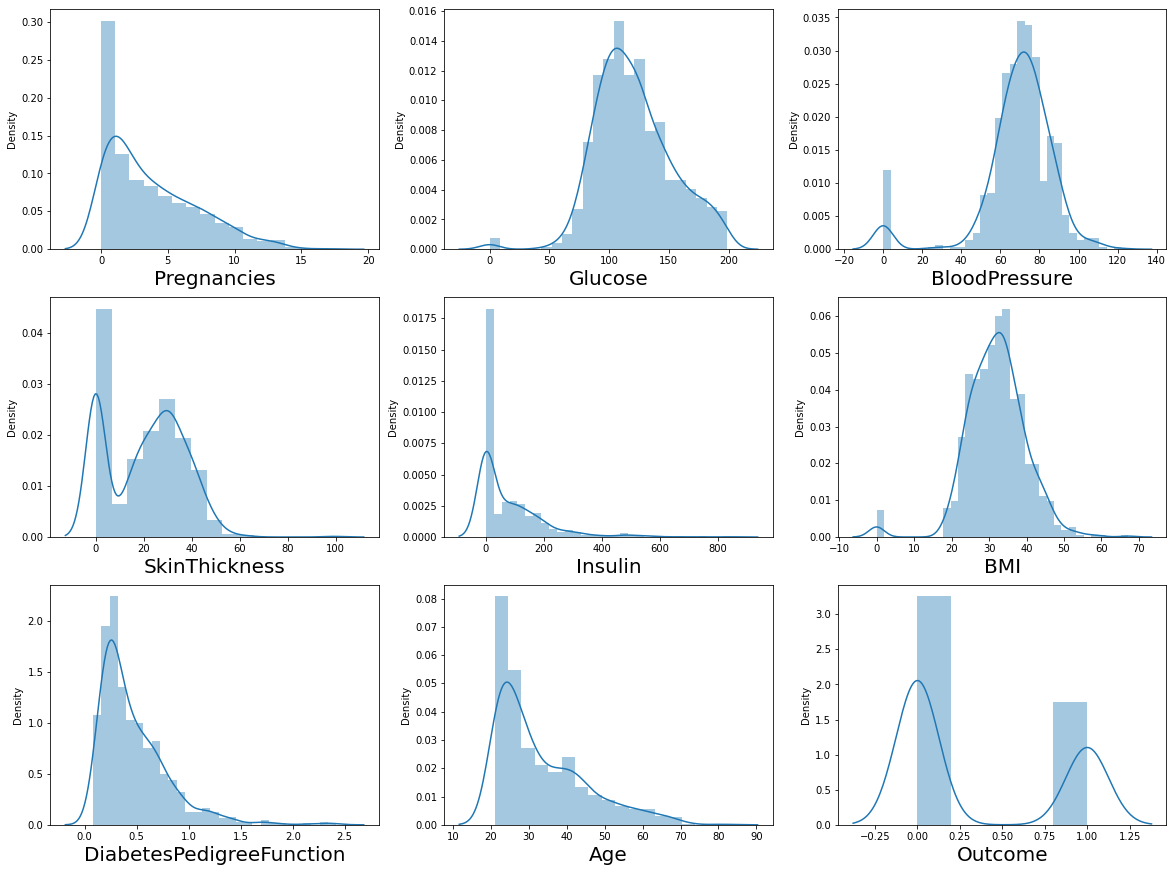

In [198]:
plt.figure(figsize=(20,15),facecolor='white')
plot_num=1
for column in df:
  if plot_num <= 9:
    ax=plt.subplot(3,3,plot_num)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
  plot_num+=1
plt.show()

In [199]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [200]:

# Check how many data point have 0 value
df[df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] <= 0].count()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [201]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())


In [202]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [203]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


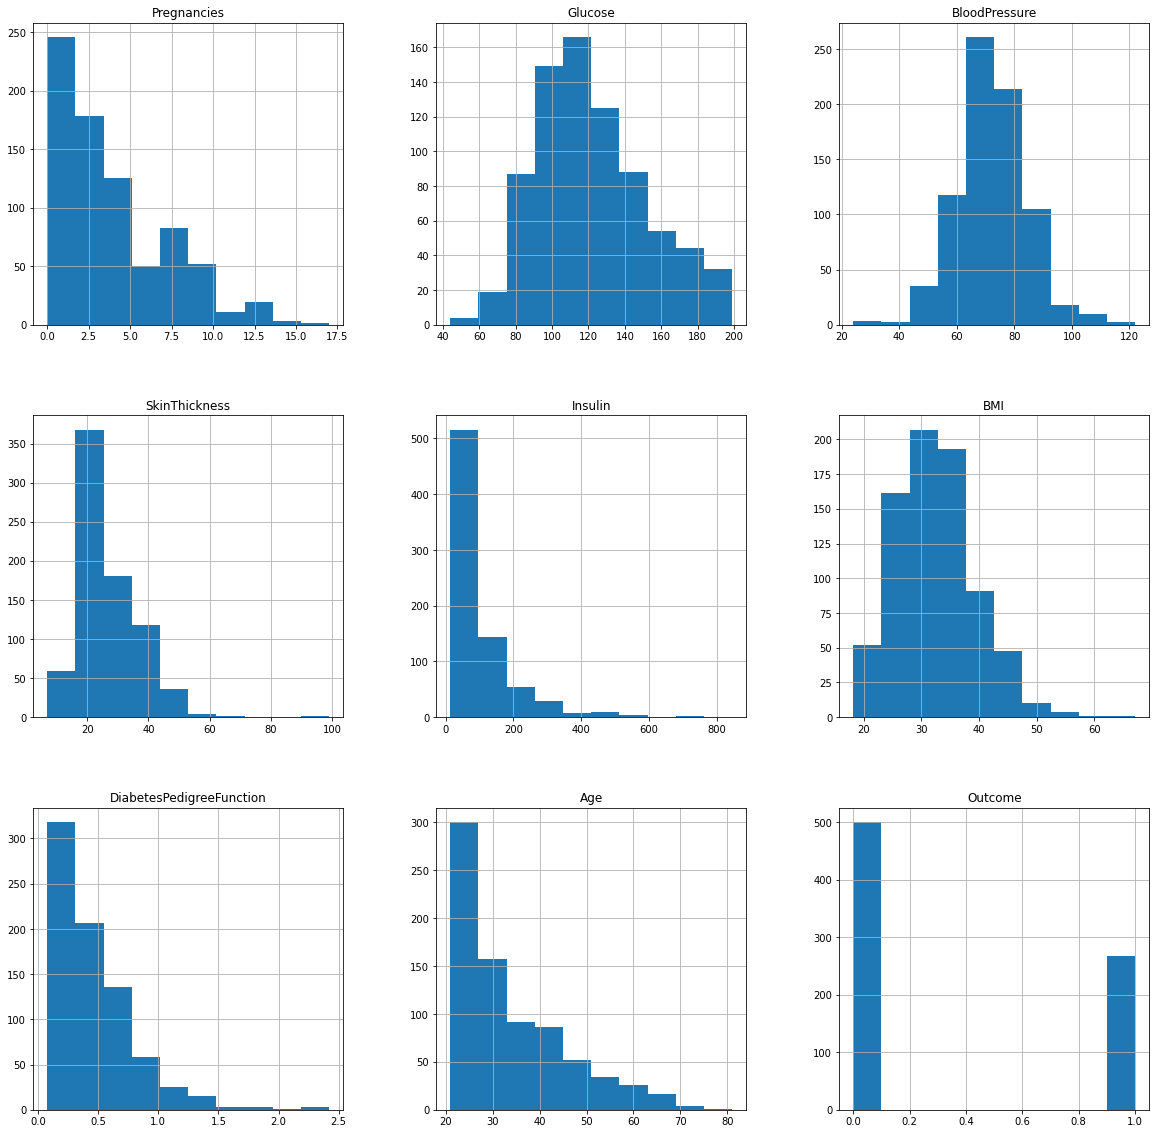

In [204]:
## Distribution of data after replacing the zero values with mean
p = df.hist(figsize = (20,20))

<ipython-input-205-9dcbe0185799>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-205-9dcbe0185799>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-205-9dcbe0185799>:8: UserWarning: 

`distplot` is a deprecated function and will be removed i

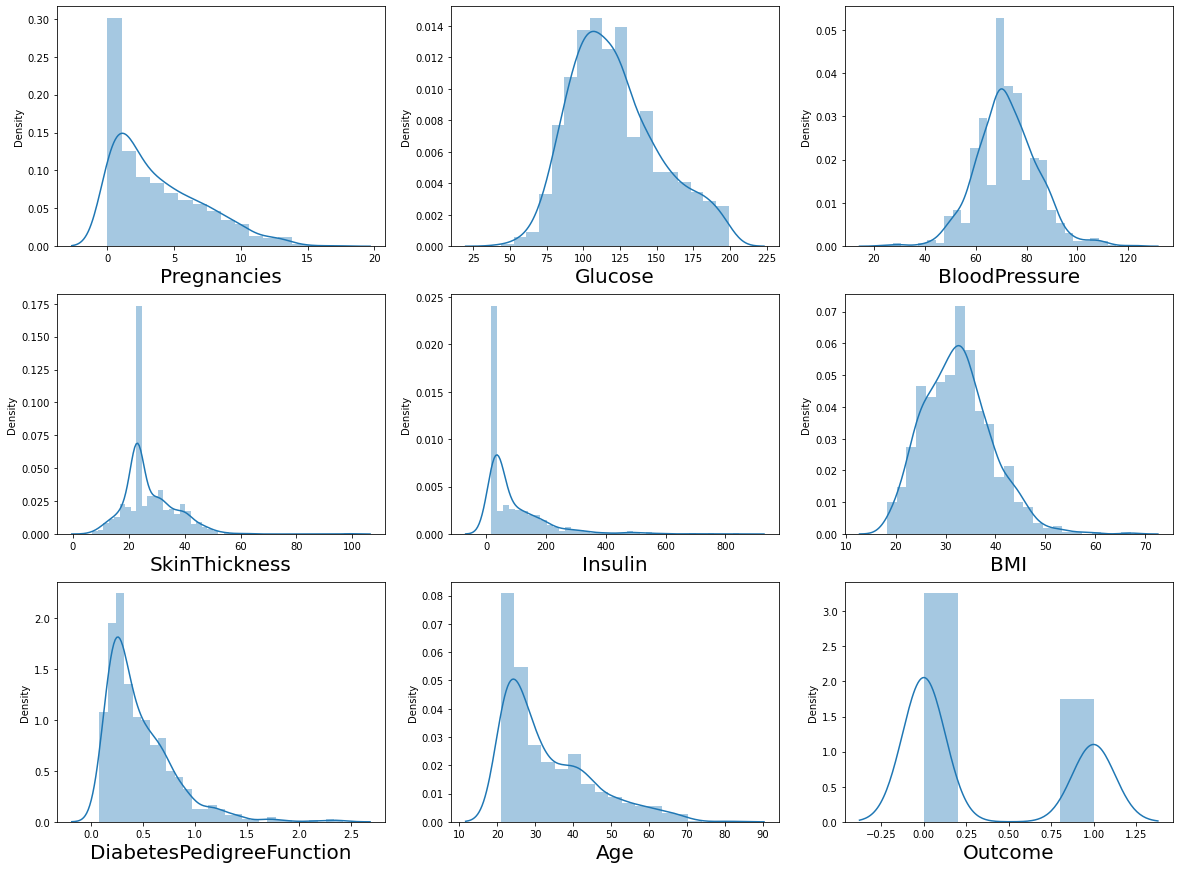

In [205]:

plt.figure(figsize=(20,15),facecolor='white')
plot_num=1


for column in df:
  if plot_num <= 9:
    ax=plt.subplot(3,3,plot_num)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
  plot_num+=1
plt.show()

# **Handling Outliers**

<Axes: >

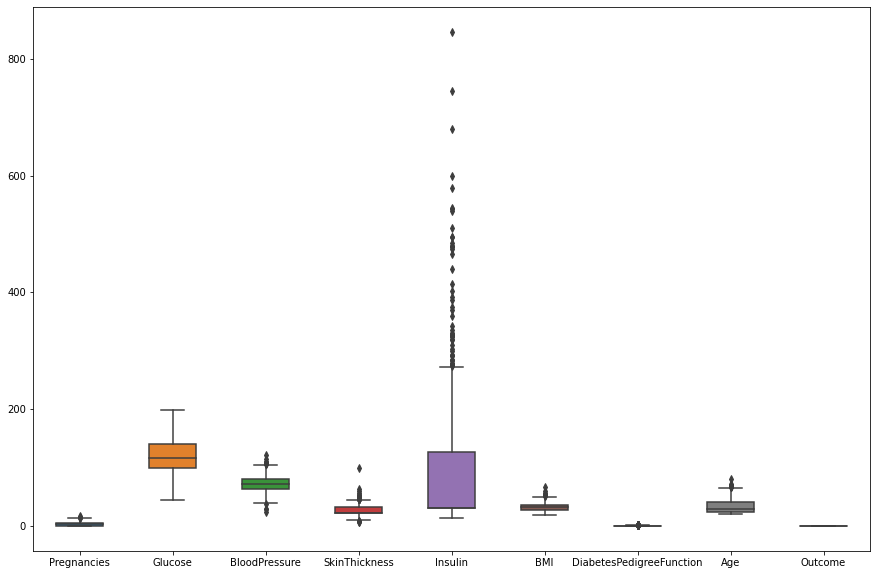

In [206]:
## find the outlier in the dataset
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5)

<Axes: >

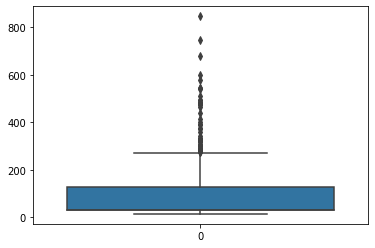

In [207]:
sns.boxplot(df['Insulin'])

In [208]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

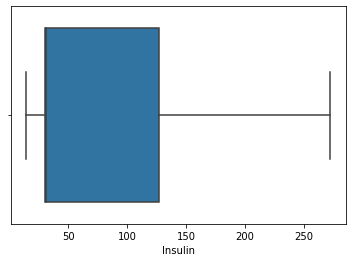

In [209]:
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

<Axes: >

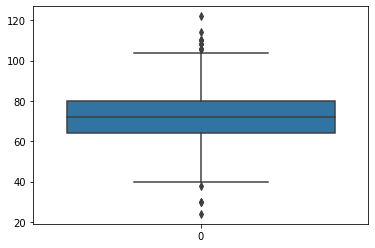

In [210]:
sns.boxplot(df['BloodPressure'])

In [211]:
Q1 = df.BloodPressure.quantile(0.25)
Q3 = df.BloodPressure.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["BloodPressure"] > upper,"BloodPressure"] = upper
df.loc[df["BloodPressure"] < lower,"BloodPressure"] = lower

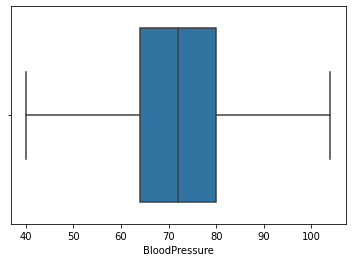

In [212]:
sns.boxplot(x = df["BloodPressure"]);

<Axes: >

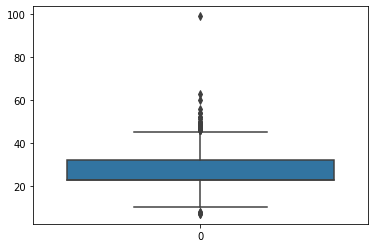

In [213]:
sns.boxplot(df['SkinThickness'])

In [214]:
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["SkinThickness"] > upper,"SkinThickness"] = upper
df.loc[df["SkinThickness"] < lower,"SkinThickness"] = lower

<Axes: >

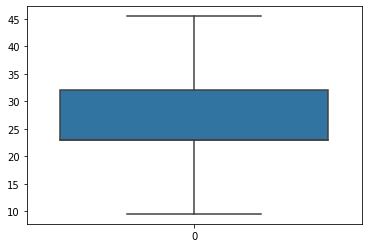

In [215]:
sns.boxplot(df['SkinThickness'])

<Axes: >

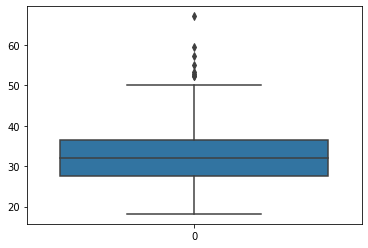

In [216]:
sns.boxplot(df['BMI'])

In [217]:
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["BMI"] > upper,"BMI"] = upper
df.loc[df["BMI"] < lower,"BMI"] = lower

<Axes: >

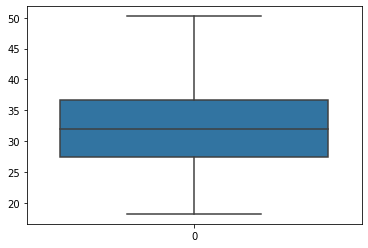

In [218]:
sns.boxplot(df['BMI'])

<Axes: >

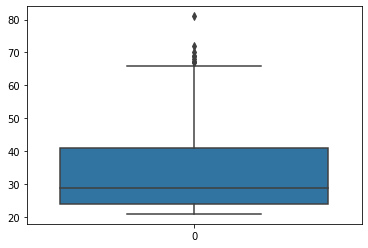

In [219]:
sns.boxplot(df['Age'])

In [220]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Age"] > upper,"Age"] = upper
df.loc[df["Age"] < lower,"Age"] = lower

<Axes: >

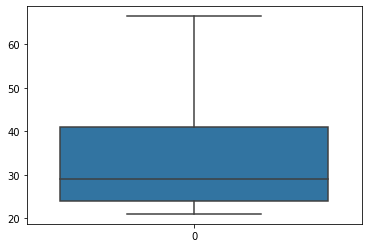

In [221]:
sns.boxplot(df['Age'])

<Axes: >

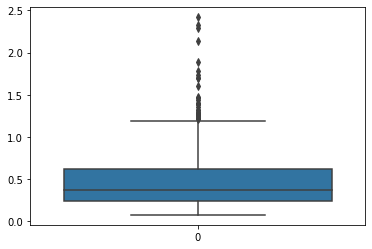

In [222]:
sns.boxplot(df['DiabetesPedigreeFunction'])

In [223]:
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["DiabetesPedigreeFunction"] > upper,"DiabetesPedigreeFunction"] = upper
df.loc[df["DiabetesPedigreeFunction"] < lower,"DiabetesPedigreeFunction"] = lower

<Axes: >

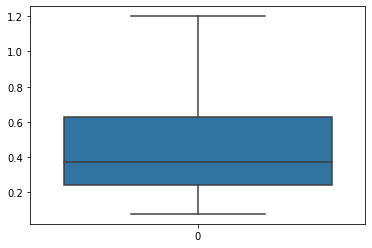

In [224]:
sns.boxplot(df['DiabetesPedigreeFunction'])

In [225]:
# The classes of the outcome variable were examined.
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

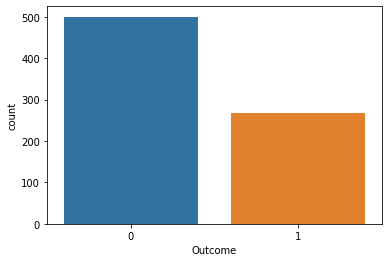

In [226]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = df)

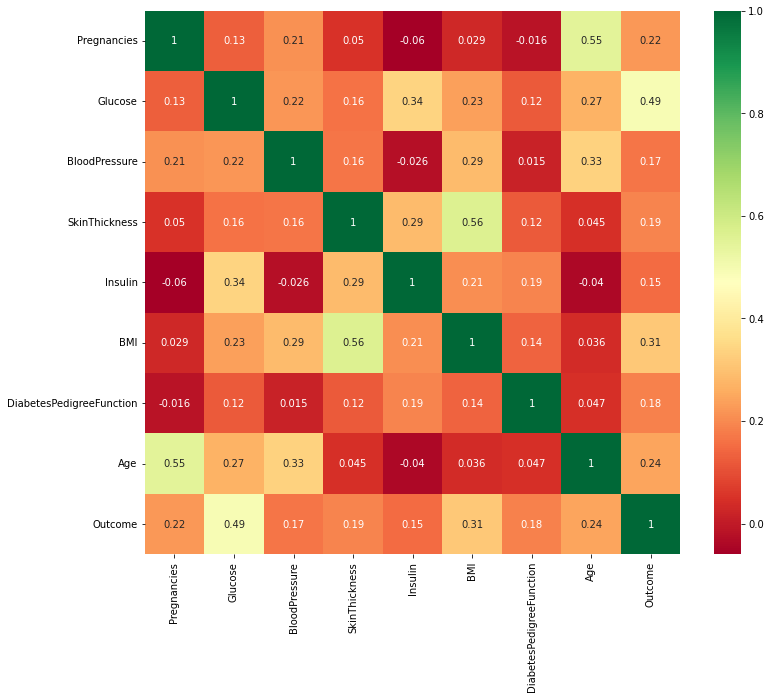

In [227]:
##Correlation between all the features
plt.figure(figsize=(12,10))
# showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

# **TRAIN TEST SPLIT**

In [228]:
train = df.sample(frac=0.7, random_state=143)
test = df.drop(train.Outcome)

In [229]:
X_train = train.drop('Outcome', axis=1)
y_train = train['Outcome']
X_test = test.drop('Outcome', axis=1)
y_test = test['Outcome']

In [230]:
X_train.shape

(538, 8)

In [231]:
X_test.shape

(766, 8)

In [232]:
y_train.shape

(538,)

In [233]:
y_test.shape

(766,)

In [234]:
import numpy as np
from collections import Counter
import random

def gini_impurity(y):
    """Calculate the Gini impurity of a list of class labels."""
    counter = Counter(y)
    impurity = 1
    for label in counter:
        prob = counter[label] / len(y)
        impurity -= prob ** 2
    return impurity
    

def split_data(X, y, feature, threshold):
    """Split the data based on a feature and threshold."""
    left_X, left_y, right_X, right_y = [], [], [], []
    for i in range(len(X)):
        if X[i][feature] < threshold:
            left_X.append(X[i])
            left_y.append(y[i])
        else:
            right_X.append(X[i])
            right_y.append(y[i])
    return np.array(left_X), np.array(left_y), np.array(right_X), np.array(right_y)

def find_best_split(X, y):
    """Find the best feature and threshold to split the data."""
    best_feature, best_threshold, best_gini = None, None, 1
    for feature in range(X.shape[1]):
        thresholds = list(set(X[:, feature]))
        for threshold in thresholds:
            left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
            if len(left_y) == 0 or len(right_y) == 0:
                continue
            gini = (len(left_y) / len(y)) * gini_impurity(left_y) + (len(right_y) / len(y)) * gini_impurity(right_y)
            if gini < best_gini:
                best_feature, best_threshold, best_gini = feature, threshold, gini
    return best_feature, best_threshold

class DecisionTree:
    """A decision tree for classification."""
    
    def __init__(self, max_depth=None):
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.label = None
        self.max_depth = max_depth
    
    def fit(self, X, y, depth=0):
        """Build the decision tree recursively."""
        if self.max_depth is not None and depth >= self.max_depth:
            self.label = Counter(y).most_common()[0][0]
            return
        if len(set(y)) == 1:
            self.label = y[0]
            return
        best_feature, best_threshold = find_best_split(X, y)
        self.feature = best_feature
        self.threshold = best_threshold
        left_X, left_y, right_X, right_y = split_data(X, y, best_feature, best_threshold)
        self.left = DecisionTree(max_depth=self.max_depth)
        self.right = DecisionTree(max_depth=self.max_depth)
        self.left.fit(left_X, left_y, depth+1)
        self.right.fit(right_X, right_y, depth+1)
    
    def predict(self, X):
        """Make predictions for a list of samples."""
        predictions = []
        for sample in X:
            node = self
            while node.label is None:
                if sample[node.feature] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            predictions.append(node.label)
        return np.array(predictions)

class RandomForestClassifier:
    """A random forest classifier."""
    
    def __init__(self,n_trees=10, n_estimators=100, max_depth=None, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features
    
    def fit(self, X, y):
        """Build the random forest classifier."""
        self.trees = []
        self.feature_indices = []
        n_features = X.shape[1]
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))
        for i in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth)
            feature_indices = random.sample(range(n_features), self.max_features)
            self.feature_indices.append(feature_indices)
            tree_X = X[:, feature_indices]
            tree.fit(tree_X, y)
            self.trees.append(tree)
    
    def predict(self, X):
        """Make predictions for a list of samples."""
        predictions = []
        for i in range(self.n_trees):
            tree = self.trees[i]
            feature_indices = self.feature_indices[i]
            tree_X = X[:, feature_indices]
            tree_predictions = tree.predict(tree_X)
            predictions.append(tree_predictions)
        predictions = np.array(predictions)
        return np.apply_along_axis(lambda x: Counter(x).most_common()[0][0], axis=0, arr=predictions)


In [235]:
clf = RandomForestClassifier(n_estimators=100,max_depth=5,max_features=5)
clf.fit(X_train.values,y_train.values.ravel())

# Make predictions on the test data
y_pred = clf.predict(X_test.values)

In [236]:
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))


In [237]:
accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8289817232375979


In [238]:
import numpy as np
def confusion_metrics(y_true, y_pred):
     tp=np.where((y_true == 1) & (y_pred == 1)).sum()
     tn=np.where((y_true== 0) & (y_pred == 0)).sum()
     fp=np.where((y_true == 0) & (y_pred == 1)).sum()
     fn=np.where((y_true == 1) & (y_pred == 0)).sum()
     precision = tp/(tp+fp)
     recall = tp/(tp+fn)
     accuracy= (tp + tn)/(tp+tn+fp+fn)
     f1 = 2*(precision*recall)/(precision+recall)
     cm = [accuracy,precision,recall,f1]
     return cm

In [239]:
cm=confusion_metrics(y_test.values, y_pred)
print(cm)

AttributeError: ignored

In [ ]:
import numpy as np

def cross_val_score(model, X, y, cv):
    scores = []
    fold_size = len(X) // cv
    
    for i in range(cv):
        # Split the data into training and testing sets
        X_train = np.concatenate([X[:i*fold_size], X[(i+1)*fold_size:]])
        y_train = np.concatenate([y[:i*fold_size], y[(i+1)*fold_size:]])
        X_test = X[i*fold_size:(i+1)*fold_size]
        y_test = y[i*fold_size:(i+1)*fold_size]
        
        # Train the model on the training set and evaluate on the testing set
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        scores.append(score)
    
    return scores

In [ ]:
clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_Train,Y_Train)